***
# K-means clustering
***
***
author --- louis tomczyk<br>
institution --- Xidian University<br>
student id --- 211.561.13.752<br>
date --- 2021.11.28<br>
course --- X2 CS 10 26 - Machine Learning<br>
contact --- <louis.tomczyk.work@gmail.com><br>
bibliography --- <br>
- __[Scikit-learn : Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)__
***



## 0/ Maintenance
***

### General packages

In [ ]:
# basic maths
import numpy as np

# ploting
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

# tools for arrays etc.
import pandas as pd

# importing Fisher Iris dataset
from sklearn.datasets import load_iris

# Performance evaluation metris
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import precision_score as precision
from sklearn.metrics import recall_score as recall
from sklearn.metrics import f1_score as f1

# splitting data for k-fold validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# other tools
from sklearn.multiclass import OneVsRestClassifier

# re-scaling values
from sklearn.preprocessing import StandardScaler


### Plot parameters

In [ ]:
fig_width       = 10
fig_height      = fig_width/1.618
fig_resolution  = fig_width*fig_height


plt.rcParams['figure.figsize']  = (fig_width, fig_height*2)
plt.rcParams['figure.dpi']      = 50
plt.rcParams['font.weight']     = "normal"
plt.rcParams['axes.labelweight']= "bold"
plt.rcParams['axes.linewidth']  = "0.1"
plt.rcParams["axes.titlesize"]  = "20"
plt.rcParams["axes.labelsize"]  = "12"
plt.rcParams["axes.titleweight"]= "bold"

draw_plot = 1

### Loading data

In [ ]:
file_name = "Data.csv"
X = pd.read_csv(file_name)
X.drop(['sample'],axis=1,inplace=True)
x = X["density"]
y = X["sugar_content"]
X.head()


## 1/ Data Importation
***

In [ ]:
plt.scatter(x,y)
plt.xlabel("density")
plt.ylabel("sugar content")
plt.show()

## 2/ Data analysis
***

### Visualisation of raw data

### Visualisation of the statistics

In [ ]:
if draw_plot == 1:
    fig, axes = plt.subplots(nrows=2, ncols=2)

    fig.set_figheight(fig_height*2)
    fig.set_figwidth(fig_width*2)

    X.plot(kind='line',ax=axes[0,0])
    X.plot(kind='box',ax=axes[0,1])
    X.plot(kind='density',ax=axes[1,0])
    X.plot(kind='hist',ax=axes[1,1])
    plt.show()

## 3/ Data pre-processing
***

### Re-scaling the data
needed if we want to have a proper working algorithms.

In [ ]:
scaler  = StandardScaler()
X       = scaler.fit_transform(X)
X       = pd.DataFrame(X)

### Visualisation of the changes in the statistics

In [ ]:
if draw_plot == 1:
    fig, axes = plt.subplots(nrows=2, ncols=2)

    fig.set_figheight(13)
    fig.set_figwidth(21)

    X.plot(kind='line',ax=axes[0,0])
    X.plot(kind='box',ax=axes[0,1])
    X.plot(kind='density',ax=axes[1,0])
    X.plot(kind='hist',ax=axes[1,1])

    plt.show()

### Splitting the datasets into train and test sub-datasets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33)
X_train = np.array(X_train)
X_train = X_train.reshape(-1,1)
y_test = np.array(y_test)

## 4/ Training
***

### a/ Using Sklearn

In [ ]:
from sklearn.cluster import KMeans

kmeans_random   = KMeans(init='random',n_clusters=3)
label_random    = kmeans.fit_predict(X_train)

kmeans_pp       = KMeans(init='k-means++',n_clusters=3)
label_pp        = kmeans.fit_predict(X_train)

label_diff      = label_random-label_pp
print(label_diff)

In [ ]:
plt.scatter(X_train,y_train,c=label_random)
plt.xlabel("density")
plt.ylabel("sugar content")
plt.show()

In [ ]:

# Run a number of tests, for 1, 2, ... num_clusters
num_clusters = 10
kmeans_tests = [KMeans(n_clusters=i) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(X_train).score(X_train) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### b/ from scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# ======================================        DISTANCE

def distance(A,B,dist_method="euclidian"):

    # formating
    A   = np.array(A).reshape(-1,2)
    B   = np.array(B).reshape(-1,2)

    # to make formula more easy to read
    xA = A[:,0]
    yA = A[:,1]
    xB = B[:,0]
    yB = B[:,1]

    # to store all the distances
    d = np.zeros((1,A.shape[0]))

    # as a reminder : d_manhattan = |xA-xB| + |yA-yB|
    if dist_method == "manhattan":
        d = np.abs(xA-xB)+np.abs(yA-yB)
        return d

    # as a reminder : d_manhattan = v[(xA-xB)² + (yA-yB)²]
    elif dist_method == "euclidian":
        d = np.sqrt((xA-xB)**2+(yA-yB)**2)
        return d

# ======================================        INIT_CENTROIDS

def init_centroids(data,number_clusters,init_method="random"):
    
    centroids = np.zeros((1,number_clusters))
    n_samples = data.shape[0]

    # other methods could be implemented, like the k-means++
    if init_method == "random":

        # we randomly choose indices
        indices     = np.random.choice(n_samples,number_clusters)

        # and we pick the initial centroids from the dataset
        centroids   = data[indices,:]
        
        return centroids

# ======================================        ASSIGN CLUSTER

def assign_cluster(centroids,data,dist_method="euclidian"):

    n_samples   = data.shape[0]
    n_centroids = centroids.shape[0]
    clusters    = [[] for k in range(n_centroids)]
    dist        = np.zeros((n_centroids,n_samples))

    # for each centroid (k)
    # we compute the distance of each dataset sample (j)
    for k in range(n_centroids):
        for j in range(n_samples):
            dist[k,j]   = distance(centroids[k],data[j])

    # we look for the closest dataset samples from each centroid
    indices_of_minima   = np.argmin(dist,axis=0)

    # then we assign the closest dataset samples to its cluster
    for j in range(n_samples):
        clusters[indices_of_minima[j]].append(data[j])

    return clusters

# ======================================        UPDATE CENTROIDS

def update_centroids(old_centroids,data):

    n_centroids     = old_centroids.shape[0]
    new_centroids   = np.zeros((n_centroids,2)).T

    # we compute the distance between each centroid (k)
    # and each sample from the dataset (j)
    for k in range(n_centroids):
        for j in range(2):
            new_centroids[k,j] = np.mean(data[k].T[j])

    # formating to return a matrix with all the centroids
    # movements
    old_centroids   = old_centroids.reshape(-1,len(old_centroids))
    new_centroids   = new_centroids.reshape(-1,len(new_centroids))
    Centroids       = [old_centroids,new_centroids]
    
    return Centroids

# ======================================        CENTROID MOVEMENT

def centroid_movement(old_centroids,new_centroids,dist_method):
    return distance(old_centroids,new_centroids,dist_method=dist_method)

# ======================================        PLOT CLUSTERS

def plot_clusters(clusters,centroids):

    n_clusters = len(clusters)
    n_centroids= len(centroids)

    # we plot the clusters
    for k in range(n_clusters):
        X = np.array(clusters[k]).T[0]
        Y = np.array(clusters[k]).T[1]
        plt.scatter(X,Y)

    # then we show the centroids location
    X = np.array(centroids).T[0]
    Y = np.array(centroids).T[1]
    plt.scatter(X,Y,color='black')
    
    plt.show()

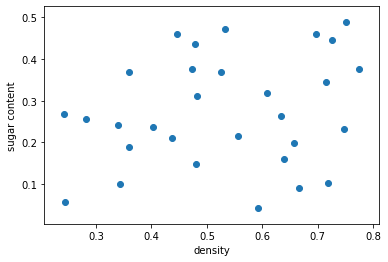

In [16]:
file_name   = "Data.csv"
X           = pd.read_csv(file_name)
X.drop(['sample'],axis=1,inplace=True)
Data        = np.array(X)

plt.scatter(X["density"],X["sugar_content"])
plt.xlabel("density")
plt.ylabel("sugar content")
plt.show()


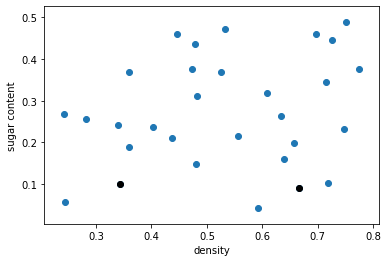

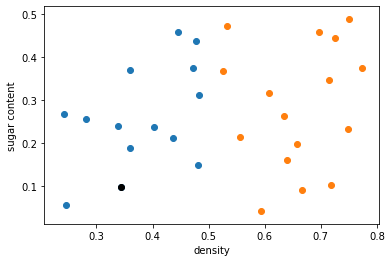

In [18]:
Centroids = init_centroids(
    data            = Data,
    number_clusters = 2
)

plt.scatter(X["density"],X["sugar_content"])
plt.scatter(Centroids.T[0],Centroids.T[1],color="black")

plt.xlabel("density")
plt.ylabel("sugar content")
plt.show()

Init_Clusters = assign_cluster(
    centroids   = Centroids,
    data        = Data
)

plot_clusters(
    clusters    = Init_Clusters,
    centroids   = Centroids[0]
)


In [13]:
Centroids = update_centroids(old_centroids=Init_Centroids,data=Data)
print(Centroids)
print(centroid_movement(Centroids[0],Centroids[1],dist_method='manhattan'))


[array([[0.446, 0.459],
       [0.343, 0.099]]), array([[0.697, 0.46 ],
       [0.774, 0.376]])]
[0.252 0.708]
